In [1]:
import pandas as pd
import numpy as np

# featuretools for automated feature engineering
#import featuretools as ft

# matplotlib and seaborn for visualizations
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')


In [2]:
app_train = pd.read_csv('train_final.csv').sort_values('SK_ID_CURR').reset_index(drop = True)

In [3]:
app_train

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_INSTALMENT_min_sum,client_installments_AMT_PAYMENT_sum_max,client_installments_AMT_INSTALMENT_sum_max,client_installments_AMT_PAYMENT_mean_sum,client_installments_AMT_INSTALMENT_mean_sum,client_installments_AMT_INSTALMENT_max_sum,client_installments_AMT_PAYMENT_max_sum,client_installments_AMT_PAYMENT_sum_sum,client_installments_AMT_INSTALMENT_sum_sum
0,0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,...,175783.73,175783.73,219625.700,219625.700,219625.690,219625.690,1.008781e+06,1.008781e+06,4.172888e+06,4.172888e+06
1,1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,...,1154108.20,1154108.20,1150977.400,1150977.400,1618864.600,1618864.600,4.394102e+06,4.394102e+06,1.134881e+07,1.134881e+07
2,2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,...,16071.75,16071.75,21288.465,21288.465,21288.465,21288.465,3.172190e+04,3.172190e+04,6.386539e+04,6.386539e+04
3,3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,...,994476.70,994476.70,691786.900,691786.900,1007153.400,1007153.400,1.057860e+06,1.057860e+06,3.719995e+06,3.719995e+06
4,4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,...,483756.38,825845.80,280199.700,294631.120,806127.940,835985.300,8.367034e+05,8.367034e+05,1.139621e+07,1.179154e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,307506,456251,0,0,0,0,0,157500.0,254700.0,27558.0,...,46241.37,46241.37,52450.470,52450.470,52450.470,52450.470,8.970507e+04,8.970507e+04,3.671533e+05,3.671533e+05
307507,307507,456252,0,0,0,1,0,72000.0,269550.0,12001.5,...,60281.28,60281.28,60419.203,60419.203,60419.203,60419.203,6.044679e+04,6.044679e+04,3.625152e+05,3.625152e+05
307508,307508,456253,0,0,0,1,0,153000.0,677664.0,29979.0,...,41805.99,61529.04,33413.758,33413.758,57622.812,61595.910,6.166175e+04,6.166175e+04,3.048920e+05,3.247575e+05
307509,307509,456254,1,0,0,1,0,171000.0,370107.0,20205.0,...,194556.81,194556.81,171592.420,171592.420,194556.810,194556.810,1.945568e+05,1.945568e+05,1.773976e+06,1.773976e+06


In [4]:
x=app_train.drop(columns = ['TARGET','Unnamed: 0'])

In [5]:
x

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_INSTALMENT_min_sum,client_installments_AMT_PAYMENT_sum_max,client_installments_AMT_INSTALMENT_sum_max,client_installments_AMT_PAYMENT_mean_sum,client_installments_AMT_INSTALMENT_mean_sum,client_installments_AMT_INSTALMENT_max_sum,client_installments_AMT_PAYMENT_max_sum,client_installments_AMT_PAYMENT_sum_sum,client_installments_AMT_INSTALMENT_sum_sum
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,175783.73,175783.73,219625.700,219625.700,219625.690,219625.690,1.008781e+06,1.008781e+06,4.172888e+06,4.172888e+06
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,1154108.20,1154108.20,1150977.400,1150977.400,1618864.600,1618864.600,4.394102e+06,4.394102e+06,1.134881e+07,1.134881e+07
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,16071.75,16071.75,21288.465,21288.465,21288.465,21288.465,3.172190e+04,3.172190e+04,6.386539e+04,6.386539e+04
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,994476.70,994476.70,691786.900,691786.900,1007153.400,1007153.400,1.057860e+06,1.057860e+06,3.719995e+06,3.719995e+06
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,483756.38,825845.80,280199.700,294631.120,806127.940,835985.300,8.367034e+05,8.367034e+05,1.139621e+07,1.179154e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,...,46241.37,46241.37,52450.470,52450.470,52450.470,52450.470,8.970507e+04,8.970507e+04,3.671533e+05,3.671533e+05
307507,456252,0,0,1,0,72000.0,269550.0,12001.5,225000.0,0.025164,...,60281.28,60281.28,60419.203,60419.203,60419.203,60419.203,6.044679e+04,6.044679e+04,3.625152e+05,3.625152e+05
307508,456253,0,0,1,0,153000.0,677664.0,29979.0,585000.0,0.005002,...,41805.99,61529.04,33413.758,33413.758,57622.812,61595.910,6.166175e+04,6.166175e+04,3.048920e+05,3.247575e+05
307509,456254,0,0,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,...,194556.81,194556.81,171592.420,171592.420,194556.810,194556.810,1.945568e+05,1.945568e+05,1.773976e+06,1.773976e+06


In [6]:
y=app_train.iloc[:,2].values

In [7]:
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [8]:
#x.replace([np.inf, -np.inf], np.nan)

In [9]:
def missing_values_table(df):
    mis_val=df.isnull().sum()
    mis_val_percent=100*mis_val/len(df)
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mis_val_table_ren_columns=mis_val_table.rename(columns={0:'Missing values',1:'% of Total_values'})
    mis_val_table_ren_columns=mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!=0].sort_values('% of Total_values',ascending=False).round(1)
    return mis_val_table_ren_columns

In [10]:
missing_x=missing_values_table(x)
missing_x

,Missing values,% of Total_values
previous_RATE_INTEREST_PRIVILEGED_max,302902,98.5
previous_RATE_INTEREST_PRIMARY_min,302902,98.5
previous_RATE_INTEREST_PRIMARY_mean,302902,98.5
previous_RATE_INTEREST_PRIMARY_max,302902,98.5
previous_RATE_INTEREST_PRIVILEGED_min,302902,98.5
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [11]:
x

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_INSTALMENT_min_sum,client_installments_AMT_PAYMENT_sum_max,client_installments_AMT_INSTALMENT_sum_max,client_installments_AMT_PAYMENT_mean_sum,client_installments_AMT_INSTALMENT_mean_sum,client_installments_AMT_INSTALMENT_max_sum,client_installments_AMT_PAYMENT_max_sum,client_installments_AMT_PAYMENT_sum_sum,client_installments_AMT_INSTALMENT_sum_sum
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,175783.73,175783.73,219625.700,219625.700,219625.690,219625.690,1.008781e+06,1.008781e+06,4.172888e+06,4.172888e+06
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,1154108.20,1154108.20,1150977.400,1150977.400,1618864.600,1618864.600,4.394102e+06,4.394102e+06,1.134881e+07,1.134881e+07
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,16071.75,16071.75,21288.465,21288.465,21288.465,21288.465,3.172190e+04,3.172190e+04,6.386539e+04,6.386539e+04
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,994476.70,994476.70,691786.900,691786.900,1007153.400,1007153.400,1.057860e+06,1.057860e+06,3.719995e+06,3.719995e+06
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,483756.38,825845.80,280199.700,294631.120,806127.940,835985.300,8.367034e+05,8.367034e+05,1.139621e+07,1.179154e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,...,46241.37,46241.37,52450.470,52450.470,52450.470,52450.470,8.970507e+04,8.970507e+04,3.671533e+05,3.671533e+05
307507,456252,0,0,1,0,72000.0,269550.0,12001.5,225000.0,0.025164,...,60281.28,60281.28,60419.203,60419.203,60419.203,60419.203,6.044679e+04,6.044679e+04,3.625152e+05,3.625152e+05
307508,456253,0,0,1,0,153000.0,677664.0,29979.0,585000.0,0.005002,...,41805.99,61529.04,33413.758,33413.758,57622.812,61595.910,6.166175e+04,6.166175e+04,3.048920e+05,3.247575e+05
307509,456254,0,0,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,...,194556.81,194556.81,171592.420,171592.420,194556.810,194556.810,1.945568e+05,1.945568e+05,1.773976e+06,1.773976e+06


In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
imp=SimpleImputer(strategy='mean')
imp.fit(x)
x=imp.transform(x)

In [13]:
x[x<0]=0

In [14]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
chi2_features = SelectKBest(chi2, k = 1000) 
X_kbest_features = chi2_features.fit_transform(x, y) 

In [15]:
print('Original feature number:', x.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 1185
Reduced feature number: 1000


In [16]:
X_kbest_features

array([[1.0000200e+05, 0.0000000e+00, 0.0000000e+00, ..., 1.0087812e+06,
        4.1728882e+06, 4.1728882e+06],
       [1.0000300e+05, 0.0000000e+00, 0.0000000e+00, ..., 4.3941015e+06,
        1.1348806e+07, 1.1348806e+07],
       [1.0000400e+05, 1.0000000e+00, 1.0000000e+00, ..., 3.1721895e+04,
        6.3865395e+04, 6.3865395e+04],
       ...,
       [4.5625300e+05, 0.0000000e+00, 0.0000000e+00, ..., 6.1661746e+04,
        3.0489203e+05, 3.2475750e+05],
       [4.5625400e+05, 0.0000000e+00, 0.0000000e+00, ..., 1.9455681e+05,
        1.7739758e+06, 1.7739758e+06],
       [4.5625500e+05, 0.0000000e+00, 0.0000000e+00, ..., 2.5724196e+07,
        8.1350776e+07, 6.6436548e+07]])

In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [18]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=test_size, random_state=seed)

In [19]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [20]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [21]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 92.01%


In [22]:
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, classification_report, recall_score, roc_auc_score
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
area = auc(recall, precision)

print('------------ Results for XGBClassifier ---------------')
print('cm:', confusion_matrix(y_test,y_pred))
#print('cr:', classification_report(y_test,y_pred))
#print('recall_score:', recall_score(y_test,y_pred))
print('roc_auc_score:',roc_auc_score(y_test,y_pred))
print("Area Under P-R Curve: ",area)

------------ Results for XGBClassifier ---------------
cm: [[93290    52]
 [ 8055    82]]
roc_auc_score: 0.5047601664924142
Area Under P-R Curve:  0.3506968755787337


In [23]:
precision=precision_score(y_test, predictions)
recall=recall_score(y_test, predictions)
roc=roc_auc_score(y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))
print("AUC: %.2f%% " % (roc *100))

Accuracy: 92.01%
Precision: 61.19% 
Recall: 1.01% 
AUC: 50.48% 


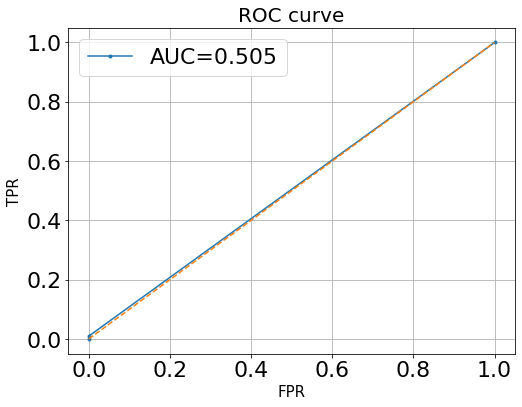

In [24]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test,y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

#### LGBM

In [25]:
import lightgbm as lgb 
from lightgbm import LGBMClassifier
from pandas import Series, DataFrame 

In [26]:
train_data=lgb.Dataset(X_test,label=y_test)

In [27]:
param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']


In [28]:
#training our model using light gbm
num_round=50
lgbm=lgb.train(param,train_data,num_round)


In [29]:
#predicting on test set
ypred=lgbm.predict(X_test)
ypred[0:5]  # showing first 5 predictions

array([0.04264824, 0.10291811, 0.03870528, 0.04131457, 0.08045202])

In [30]:
#converting probabilities into 0 or 1
for i in range(0,9769):
    if ypred[i]>=.5:       # setting threshold to .5
       ypred[i]=1
    else:  
       ypred[i]=0

In [31]:
y_test = y_test.astype('int64')

In [32]:
ypred = (ypred > 0.5)
accuracy_score(y_test, ypred)

0.9217670651070665

In [33]:
#calculating roc_auc_score for light gbm. 
auc_lgbm = roc_auc_score(y_test,ypred)
auc_lgbm

0.5123349193717358

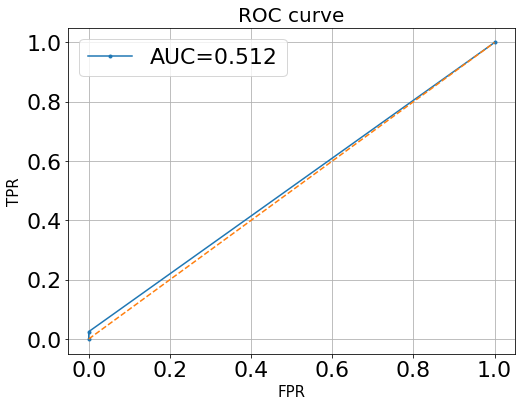

In [34]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, ypred)
auc = roc_auc_score(y_test,ypred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

In [35]:
print(confusion_matrix(y_test, ypred))

[[93339     3]
 [ 7936   201]]


In [36]:
precision=precision_score(y_test, ypred)
recall=recall_score(y_test, ypred)
roc=roc_auc_score(y_test,ypred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))
print("AUC: %.2f%% " % (roc *100))

Accuracy: 92.01%
Precision: 98.53% 
Recall: 2.47% 
AUC: 51.23% 
